2025-01-22 14:04:49.784718: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-22 14:04:49.840229: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-22 14:04:49.840280: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-22 14:04:49.841665: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-22 14:04:49.850818: I tensorflow/core/platform/cpu_feature_guar

Original Grayscale Image - Width: 248, Height: 203
1/1 [==============================] - 0s 98ms/step
summed_feature_maps - Width: 128, Height: 128
resized_img - Width: 128, Height: 128


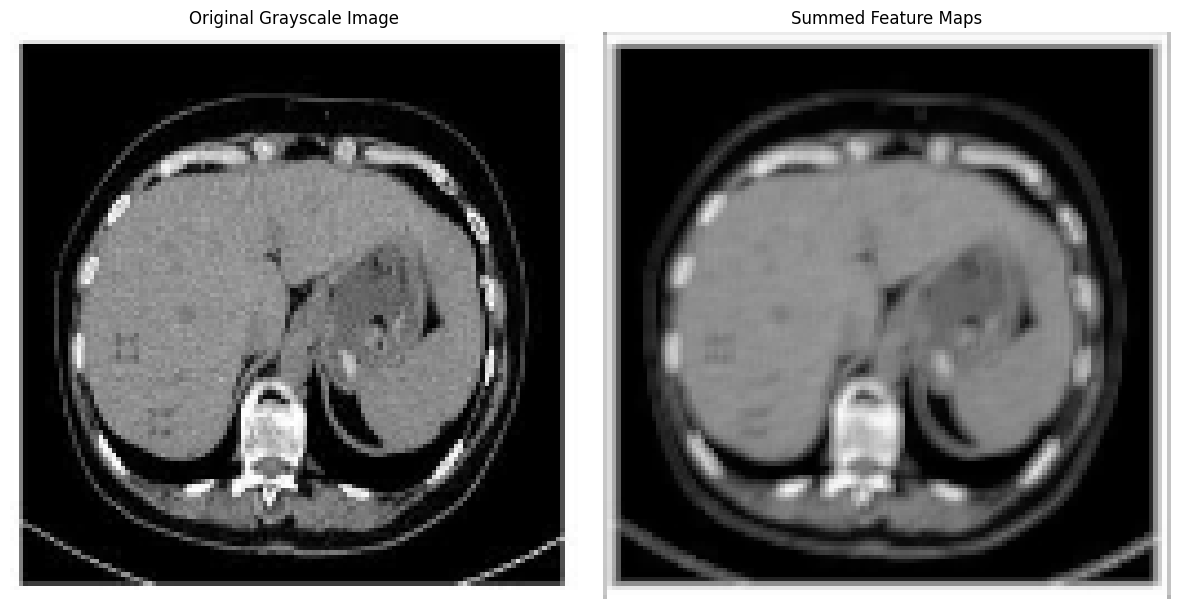

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
import cv2
import tensorflow as tf

# Clear GPU memory and set memory growth to avoid errors
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

# Set TensorFlow to use CPU only to avoid GPU memory errors
tf.config.set_visible_devices([], 'GPU')

# Load the grayscale image
img_path = '/home/icmr/Pictures/CT.jpeg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check the original image dimensions
height, width = img.shape
print(f"Original Grayscale Image - Width: {width}, Height: {height}")

# Resize the image to smaller size (optional step to reduce memory consumption)
resized_img = cv2.resize(img, (128, 128))  # Resize to smaller dimensions
resized_height, resized_width = resized_img.shape

# Normalize the resized image (scale pixel values to range [0, 1])
resized_img_normalized = resized_img / 255.0

# Add an extra dimension to represent the batch size (needed for Keras)
# Since the image is grayscale, we only have one channel
img_batch = np.expand_dims(np.expand_dims(resized_img_normalized, axis=-1), axis=0)

# Create a simple model with 64 filters using Conv2D
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(resized_height, resized_width, 1))
])

# Get the filtered output from the model (the convolution layer)
filtered_img = model.predict(img_batch)

# Remove the batch dimension to get the final image shape
filtered_img = filtered_img[0]

# Sum all feature maps to create a single image
summed_feature_maps = np.sum(filtered_img, axis=-1)  # Sum across the last axis (32 filters)

#Check the summed_feature_maps dimensions
height, width = summed_feature_maps.shape
print(f"summed_feature_maps - Width: {width}, Height: {height}")

#Check the summed_feature_maps dimensions
height, width = resized_img.shape
print(f"resized_img - Width: {width}, Height: {height}")

# Display the original image and summed feature map as subplots
plt.figure(figsize=(12, 6))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(resized_img, cmap='gray')  # Display as grayscale
plt.title('Original Grayscale Image')
plt.axis('off')

# Summed feature map image
plt.subplot(1, 2, 2)
plt.imshow(summed_feature_maps, cmap='gray')  # Display as grayscale
plt.title('Summed Feature Maps')
plt.axis('off')

plt.tight_layout()
plt.show()
